In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
crash = pd.read_csv('crashdata.csv')
crash.head()

C:\Users\Ari\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (79,183) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,ACCESS_CTRL,ROADWAY_COUNTY,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME
0,2.004000e+09,11.0,2.0,2454.0,02454,2004.0,1.0,5.0,257.0,2.0,...,3.0,2.0,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD
1,2.004000e+09,11.0,2.0,2440.0,02440,2004.0,1.0,5.0,1027.0,10.0,...,NaN,2.0,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD
2,2.004000e+09,11.0,2.0,2203.0,02203,2004.0,1.0,5.0,1839.0,18.0,...,NaN,2.0,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD
3,2.004000e+09,11.0,2.0,2404.0,02404,2004.0,1.0,6.0,914.0,9.0,...,NaN,2.0,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV
4,2.004000e+09,11.0,2.0,2419.0,02419,2004.0,1.0,5.0,2230.0,22.0,...,NaN,2.0,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR


In [151]:
traffic = pd.read_csv('data-trafficcounts.csv')
traffic.head()

,sensor_ID,Longitude,Latitude,1a,2a,3a,4a,5a,6a,7a,...,3p,4p,5p,6p,7p,8p,9p,10p,11p,12a
0,5879@1,-79.861523,40.625398,44.0,19.0,14.0,18.0,36.0,151.0,362.0,...,481.0,604.0,678.0,790.0,575.0,431.0,416.0,227.0,188.0,119.0
1,5970@1,-79.796409,40.445047,18.0,19.0,24.0,31.0,100.0,223.0,356.0,...,463.0,561.0,535.0,402.0,315.0,258.0,200.0,119.0,78.0,36.0
2,5957@1,-79.820976,40.487624,60.0,36.0,39.0,27.0,45.0,165.0,395.0,...,532.0,637.0,662.0,715.0,611.0,511.0,429.0,247.0,170.0,106.0
3,120@1,-79.703859,40.443548,27.0,7.0,14.0,9.0,35.0,119.0,365.0,...,508.0,640.0,698.0,731.0,471.0,390.0,278.0,146.0,111.0,56.0
4,26732@1,-80.114273,40.389899,19.0,14.0,7.0,10.0,9.0,33.0,113.0,...,195.0,247.0,309.0,348.0,324.0,264.0,181.0,140.0,87.0,54.0


Regularization requires hour and location to match crash location with appropriate traffic value

In [4]:
crash_location = crash.loc[:,('CRASH_YEAR', 'CRASH_MONTH', 'HOUR_OF_DAY', 'TIME_OF_DAY',
                              'DAY_OF_WEEK','DEC_LAT', 'DEC_LONG', 'STREET_NAME')]
# Limitation of data is day of week is recorded but not day
crash_location.dropna(inplace = True)

crash_location.rename(columns={'CRASH_YEAR':'year',
                               'CRASH_MONTH':'month',
                               'HOUR_OF_DAY':'hour',
                               'TIME_OF_DAY':'time',
                               'DAY_OF_WEEK':'day'}, inplace = True)
crash_location.head()

,year,month,hour,time,day,DEC_LAT,DEC_LONG,STREET_NAME
0,2004.0,1.0,2.0,257.0,5.0,40.3234,-79.9404,LEWIS RUN RD
1,2004.0,1.0,10.0,1027.0,5.0,40.3182,-79.9076,COAL VALLEY RD
2,2004.0,1.0,18.0,1839.0,5.0,40.4886,-80.3371,CLINTON FRANKFORT RD
6,2004.0,1.0,14.0,1430.0,6.0,40.4188,-80.0494,POPLAR ST
11,2004.0,1.0,19.0,1920.0,1.0,40.4612,-80.0087,PERRYSVILLE AV


In [5]:
crash_location['minute'] = crash_location.time % 100
crash_location.head()

,year,month,hour,time,day,DEC_LAT,DEC_LONG,STREET_NAME,minute
0,2004.0,1.0,2.0,257.0,5.0,40.3234,-79.9404,LEWIS RUN RD,57.0
1,2004.0,1.0,10.0,1027.0,5.0,40.3182,-79.9076,COAL VALLEY RD,27.0
2,2004.0,1.0,18.0,1839.0,5.0,40.4886,-80.3371,CLINTON FRANKFORT RD,39.0
6,2004.0,1.0,14.0,1430.0,6.0,40.4188,-80.0494,POPLAR ST,30.0
11,2004.0,1.0,19.0,1920.0,1.0,40.4612,-80.0087,PERRYSVILLE AV,20.0


In [6]:
crash_location['datetime'] = pd.to_datetime(crash_location[['year', 'month', 'day', 'hour', 'minute']])
crash_location.head()

,year,month,hour,time,day,DEC_LAT,DEC_LONG,STREET_NAME,minute,datetime
0,2004.0,1.0,2.0,257.0,5.0,40.3234,-79.9404,LEWIS RUN RD,57.0,2004-01-05 02:57:00
1,2004.0,1.0,10.0,1027.0,5.0,40.3182,-79.9076,COAL VALLEY RD,27.0,2004-01-05 10:27:00
2,2004.0,1.0,18.0,1839.0,5.0,40.4886,-80.3371,CLINTON FRANKFORT RD,39.0,2004-01-05 18:39:00
6,2004.0,1.0,14.0,1430.0,6.0,40.4188,-80.0494,POPLAR ST,30.0,2004-01-06 14:30:00
11,2004.0,1.0,19.0,1920.0,1.0,40.4612,-80.0087,PERRYSVILLE AV,20.0,2004-01-01 19:20:00


In [7]:
crash_location.drop(['year', 'month', 'hour', 'time','day','minute'],axis = 1,inplace = True)
crash_location.head()

,DEC_LAT,DEC_LONG,STREET_NAME,datetime
0,40.3234,-79.9404,LEWIS RUN RD,2004-01-05 02:57:00
1,40.3182,-79.9076,COAL VALLEY RD,2004-01-05 10:27:00
2,40.4886,-80.3371,CLINTON FRANKFORT RD,2004-01-05 18:39:00
6,40.4188,-80.0494,POPLAR ST,2004-01-06 14:30:00
11,40.4612,-80.0087,PERRYSVILLE AV,2004-01-01 19:20:00


In [8]:
crash_location.reset_index(drop = True, inplace = True)
crash_location.head()

,DEC_LAT,DEC_LONG,STREET_NAME,datetime
0,40.3234,-79.9404,LEWIS RUN RD,2004-01-05 02:57:00
1,40.3182,-79.9076,COAL VALLEY RD,2004-01-05 10:27:00
2,40.4886,-80.3371,CLINTON FRANKFORT RD,2004-01-05 18:39:00
3,40.4188,-80.0494,POPLAR ST,2004-01-06 14:30:00
4,40.4612,-80.0087,PERRYSVILLE AV,2004-01-01 19:20:00


In [152]:
# Replacing null values
traffic.replace(-1,np.NaN,inplace = True)
traffic.head(10)

,sensor_ID,Longitude,Latitude,1a,2a,3a,4a,5a,6a,7a,...,3p,4p,5p,6p,7p,8p,9p,10p,11p,12a
0,5879@1,-79.861523,40.625398,44.0,19.0,14.0,18.0,36.0,151.0,362.0,...,481.0,604.0,678.0,790.0,575.0,431.0,416.0,227.0,188.0,119.0
1,5970@1,-79.796409,40.445047,18.0,19.0,24.0,31.0,100.0,223.0,356.0,...,463.0,561.0,535.0,402.0,315.0,258.0,200.0,119.0,78.0,36.0
2,5957@1,-79.820976,40.487624,60.0,36.0,39.0,27.0,45.0,165.0,395.0,...,532.0,637.0,662.0,715.0,611.0,511.0,429.0,247.0,170.0,106.0
3,120@1,-79.703859,40.443548,27.0,7.0,14.0,9.0,35.0,119.0,365.0,...,508.0,640.0,698.0,731.0,471.0,390.0,278.0,146.0,111.0,56.0
4,26732@1,-80.114273,40.389899,19.0,14.0,7.0,10.0,9.0,33.0,113.0,...,195.0,247.0,309.0,348.0,324.0,264.0,181.0,140.0,87.0,54.0
5,27598@1,-80.034512,40.438256,45.0,40.0,28.0,42.0,58.0,270.0,734.0,...,767.0,815.0,84.0,988.0,697.0,523.0,321.0,312.0,193.0,122.0
6,3688@1,-80.279735,40.510567,52.0,42.0,15.0,21.0,30.0,76.0,248.0,...,612.0,682.0,717.0,628.0,406.0,369.0,326.0,281.0,174.0,127.0
7,6029@1,-79.819557,40.369132,5.0,1.0,NaN,7.0,15.0,31.0,39.0,...,76.0,99.0,78.0,72.0,56.0,56.0,35.0,30.0,9.0,6.0
8,27849@1,-79.998630,40.451181,12.0,14.0,26.0,19.0,18.0,46.0,138.0,...,110.0,127.0,117.0,138.0,116.0,98.0,74.0,57.0,47.0,24.0
9,5510@1,-80.162117,40.384598,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4.0,3.0,5.0,14.0,9.0,13.0,11.0,2.0,1.0,1.0


In [153]:
# Reordering the traffic dataframe to match the latitude longitude form of the crash dataframe
traffic_cols = traffic.columns.tolist()
traffic_cols = traffic_cols[1:] + [traffic_cols[0]]
traffic_cols[0] = 'Latitude'
traffic_cols[1] = 'Longitude'
traffic = traffic[traffic_cols]
traffic.head()

,Latitude,Longitude,1a,2a,3a,4a,5a,6a,7a,8a,...,4p,5p,6p,7p,8p,9p,10p,11p,12a,sensor_ID
0,40.625398,-79.861523,44.0,19.0,14.0,18.0,36.0,151.0,362.0,606.0,...,604.0,678.0,790.0,575.0,431.0,416.0,227.0,188.0,119.0,5879@1
1,40.445047,-79.796409,18.0,19.0,24.0,31.0,100.0,223.0,356.0,385.0,...,561.0,535.0,402.0,315.0,258.0,200.0,119.0,78.0,36.0,5970@1
2,40.487624,-79.820976,60.0,36.0,39.0,27.0,45.0,165.0,395.0,584.0,...,637.0,662.0,715.0,611.0,511.0,429.0,247.0,170.0,106.0,5957@1
3,40.443548,-79.703859,27.0,7.0,14.0,9.0,35.0,119.0,365.0,550.0,...,640.0,698.0,731.0,471.0,390.0,278.0,146.0,111.0,56.0,120@1
4,40.389899,-80.114273,19.0,14.0,7.0,10.0,9.0,33.0,113.0,232.0,...,247.0,309.0,348.0,324.0,264.0,181.0,140.0,87.0,54.0,26732@1


In [154]:
# Rename columns in traffic
# Must rename columns of traffic to match 0-23 hour system
traffic_cols = traffic.columns.tolist()
traffic_cols[2:-1] = list(range(1,25))
print(len(traffic_cols))
# Not easy way to perform modulus here afaik so handle the 0/24 case in function
traffic.columns = traffic_cols
traffic.head(),traffic.loc[:,5].head()

27


(    Latitude  Longitude     1     2     3     4      5      6      7      8  \
 0  40.625398 -79.861523  44.0  19.0  14.0  18.0   36.0  151.0  362.0  606.0   
 1  40.445047 -79.796409  18.0  19.0  24.0  31.0  100.0  223.0  356.0  385.0   
 2  40.487624 -79.820976  60.0  36.0  39.0  27.0   45.0  165.0  395.0  584.0   
 3  40.443548 -79.703859  27.0   7.0  14.0   9.0   35.0  119.0  365.0  550.0   
 4  40.389899 -80.114273  19.0  14.0   7.0  10.0    9.0   33.0  113.0  232.0   
 
      ...         16     17     18     19     20     21     22     23     24  \
 0    ...      604.0  678.0  790.0  575.0  431.0  416.0  227.0  188.0  119.0   
 1    ...      561.0  535.0  402.0  315.0  258.0  200.0  119.0   78.0   36.0   
 2    ...      637.0  662.0  715.0  611.0  511.0  429.0  247.0  170.0  106.0   
 3    ...      640.0  698.0  731.0  471.0  390.0  278.0  146.0  111.0   56.0   
 4    ...      247.0  309.0  348.0  324.0  264.0  181.0  140.0   87.0   54.0   
 
    sensor_ID  
 0     5879@1  
 1  

In [155]:
# Removing rows where all traffic data is NaN
# Don't think this is actually dropping rows so maybe there is some traffic data for all?
traffic.dropna(axis = 0,how = 'all', subset = list(range(1,25)), inplace = True)

In [156]:
traffic.iloc[:,2:-1].head()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,44.0,19.0,14.0,18.0,36.0,151.0,362.0,606.0,477.0,315.0,...,481.0,604.0,678.0,790.0,575.0,431.0,416.0,227.0,188.0,119.0
1,18.0,19.0,24.0,31.0,100.0,223.0,356.0,385.0,296.0,297.0,...,463.0,561.0,535.0,402.0,315.0,258.0,200.0,119.0,78.0,36.0
2,60.0,36.0,39.0,27.0,45.0,165.0,395.0,584.0,478.0,423.0,...,532.0,637.0,662.0,715.0,611.0,511.0,429.0,247.0,170.0,106.0
3,27.0,7.0,14.0,9.0,35.0,119.0,365.0,550.0,539.0,421.0,...,508.0,640.0,698.0,731.0,471.0,390.0,278.0,146.0,111.0,56.0
4,19.0,14.0,7.0,10.0,9.0,33.0,113.0,232.0,220.0,173.0,...,195.0,247.0,309.0,348.0,324.0,264.0,181.0,140.0,87.0,54.0


In [157]:
traffic.iloc[:,2:-1].mean(axis = 1)

0       325.250000
1       248.750000
2       361.583333
3       329.000000
4       155.000000
5       429.208333
6       338.000000
7        42.304348
8        94.833333
9         4.750000
10      113.958333
11      253.541667
12       11.388889
13      279.916667
14       39.291667
15      212.956522
16      178.083333
17      300.083333
18      344.875000
19       89.791667
20      382.250000
21      667.416667
22      317.041667
23        1.700000
24      516.541667
25      397.250000
26      168.000000
27      470.083333
28      466.791667
29      534.166667
           ...    
1275    328.791667
1276     84.043478
1277    495.625000
1278    202.916667
1279    241.875000
1280     57.260870
1281    213.145833
1282     59.041667
1283    108.562500
1284    394.500000
1285    159.208333
1286    479.958333
1287    200.833333
1288    408.750000
1289    402.083333
1290    465.708333
1291     35.875000
1292     92.217391
1293    406.166667
1294    404.666667
1295     31.416667
1296    284.

In [161]:
type(traffic.iloc[:,2:-1].mean(axis = 1))

pandas.core.series.Series

In [160]:
# Not implemented see https://github.com/pandas-dev/pandas/issues/4514
# Can alternately handle in call to lookup correct traffic values
traffic.fillna(traffic.iloc[:,2:-1].mean(axis = 1), axis = 1)

NotImplementedError: Currently only can fill with dict/Series column by column

In [162]:
def LLHtoECEF(df):
    #df here is actually type series, named df becaue function applied to df
    # see http://www.mathworks.de/help/toolbox/aeroblks/llatoecefposition.html
    
    df.iloc[0] = np.deg2rad(df.iloc[0])         # Convert to radians
    df.iloc[1] = np.deg2rad(df.iloc[1])
    
    rad = np.float64(6378137.0)        # Radius of the Earth (in meters)
    f = np.float64(1.0/298.257223563)  # Flattening factor WGS84 Model
    
    cosLat = np.cos(df.iloc[0]) # Latitude is stored in first column
    sinLat = np.sin(df.iloc[0])
    FF     = (1.0-f)**2
    C      = 1/np.sqrt(cosLat**2 + FF * sinLat**2)
    S      = C * FF

    x = (rad * C)*cosLat * np.cos(df.iloc[1]) # Longitude stored in second column
    y = (rad * C)*cosLat * np.sin(df.iloc[1]) 
    z = (rad * S)*sinLat
    

    return (x ,y , z) # Returns tuple of ECEF in meters

In [163]:
traffic['ecef'] = traffic.apply(LLHtoECEF, axis = 1)
traffic.head()

,Latitude,Longitude,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,sensor_ID,ecef
0,40.625398,-79.861523,44.0,19.0,14.0,18.0,36.0,151.0,362.0,606.0,...,678.0,790.0,575.0,431.0,416.0,227.0,188.0,119.0,5879@1,"(853344.192815, -4772082.84452, 4130938.56505)"
1,40.445047,-79.796409,18.0,19.0,24.0,31.0,100.0,223.0,356.0,385.0,...,535.0,402.0,315.0,258.0,200.0,119.0,78.0,36.0,5970@1,"(861072.600669, -4783920.01924, 4115717.86947)"
2,40.487624,-79.820976,60.0,36.0,39.0,27.0,45.0,165.0,395.0,584.0,...,662.0,715.0,611.0,511.0,429.0,247.0,170.0,106.0,5957@1,"(858479.025047, -4781268.65044, 4119314.81929)"
3,40.443548,-79.703859,27.0,7.0,14.0,9.0,35.0,119.0,365.0,550.0,...,698.0,731.0,471.0,390.0,278.0,146.0,111.0,56.0,120@1,"(868818.27623, -4782629.10297, 4115591.21484)"
4,40.389899,-80.114273,19.0,14.0,7.0,10.0,9.0,33.0,113.0,232.0,...,309.0,348.0,324.0,264.0,181.0,140.0,87.0,54.0,26732@1,"(835201.086995, -4792534.86261, 4111055.53236)"


In [164]:
crash_location.head()

,DEC_LAT,DEC_LONG,STREET_NAME,datetime,ecef,sensor_distance
0,40.3234,-79.9404,LEWIS RUN RD,2004-01-05 02:57:00,"(850576.077991, -4794686.27611, 4105428.63702)",252.784803
1,40.3182,-79.9076,COAL VALLEY RD,2004-01-05 10:27:00,"(853386.215354, -4794566.40574, 4104988.39864)",409.137868
2,40.4886,-80.3371,CLINTON FRANKFORT RD,2004-01-05 18:39:00,"(815363.016972, -4788738.45089, 4119397.20706)",2335.682864
3,40.4188,-80.0494,POPLAR ST,2004-01-06 14:30:00,"(840267.393275, -4789537.24936, 4113499.3667)",621.172308
4,40.4612,-80.0087,PERRYSVILLE AV,2004-01-01 19:20:00,"(843139.559476, -4785931.47629, 4117082.73095)",501.268419


In [14]:
# For an unknown reason I need to use iloc to isolate the crash location columns before applying, likely due to datetime
crash_location['ecef'] = crash_location.iloc[:,:2].apply(LLHtoECEF, axis=1)

In [15]:
from scipy.spatial import KDTree

In [165]:
# Tuples must be split before constructing and querying tree
traffic_split = traffic.ecef.apply(pd.Series)
crash_split = crash_location.ecef.apply(pd.Series)
traffic_split.head(), crash_split.head()

(               0             1             2
 0  853344.192815 -4.772083e+06  4.130939e+06
 1  861072.600669 -4.783920e+06  4.115718e+06
 2  858479.025047 -4.781269e+06  4.119315e+06
 3  868818.276230 -4.782629e+06  4.115591e+06
 4  835201.086995 -4.792535e+06  4.111056e+06,
                0             1             2
 0  850576.077991 -4.794686e+06  4.105429e+06
 1  853386.215354 -4.794566e+06  4.104988e+06
 2  815363.016972 -4.788738e+06  4.119397e+06
 3  840267.393275 -4.789537e+06  4.113499e+06
 4  843139.559476 -4.785931e+06  4.117083e+06)

In [166]:
# Create KDTree for quick-queries to find nearest sensors
tree = KDTree(traffic_split, leafsize = 2)

In [167]:
# A query returns distance (in meters) and index of sensor which can be used to lookup sensor information in traffic dataframe
tree.query(crash_split.iloc[1,:])

(409.13786848945063, 1090)

In [168]:
# Testing KDTree accuracy, can check on GMaps, appears operational
traffic.iloc[1090,:2]

Latitude     40.3164
Longitude   -79.9034
Name: 1090, dtype: object

In [169]:
distance_index = crash_split.apply(tree.query, axis = 1)

In [170]:
# Series of tupe with 0 index corresponding with distance (m) and 1 index sensor index
distance_index.head()

0     (252.784802536, 709)
1    (409.137868489, 1090)
2     (2335.68286371, 818)
3     (621.172307926, 199)
4    (501.268418658, 1085)
dtype: object

In [171]:
lookup_df = distance_index.apply(pd.Series)

In [172]:
lookup_df.columns = ['distance_m','sensor_index']
lookup_df.head()

,distance_m,sensor_index
0,252.784803,709.0
1,409.137868,1090.0
2,2335.682864,818.0
3,621.172308,199.0
4,501.268419,1085.0


In [173]:
closest_sensor_indices = lookup_df.sensor_index.astype(int)
len(closest_sensor_indices)

141987

In [174]:
crash_location.shape

(141987, 6)

In [197]:
# How to use indices to find appropriate traffic information
traffic.iloc[closest_sensor_indices,:].head(20)

,Latitude,Longitude,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,sensor_ID,ecef
709,40.325552,-79.939428,40.0,25.0,32.0,88.0,289.0,461.0,597.0,521.0,...,772.0,559.0,438.0,352.0,277.0,211.0,146.0,66.0,6102@1,"(850630.408308, -4794519.62317, 4105610.77753)"
1090,40.316383,-79.903413,7.0,5.0,2.0,2.0,22.0,64.0,112.0,123.0,...,161.0,151.0,89.0,59.0,62.0,52.0,83.0,22.0,6090@1,"(853759.51191, -4794632.55106, 4104834.55367)"
818,40.476096,-80.314949,2.0,NaN,NaN,1.0,2.0,4.0,16.0,15.0,...,21.0,19.0,17.0,7.0,6.0,5.0,3.0,1.0,26743@1,"(817365.978734, -4789311.41752, 4118341.14462)"
199,40.424392,-80.049577,84.0,59.0,39.0,43.0,57.0,168.0,400.0,584.0,...,830.0,798.0,714.0,632.0,507.0,359.0,241.0,152.0,5482@1,"(840182.989335, -4789143.25329, 4113972.12256)"
1085,40.465582,-80.010122,35.0,22.0,9.0,15.0,19.0,48.0,142.0,382.0,...,350.0,245.0,170.0,127.0,107.0,76.0,85.0,46.0,27377@1,"(842966.020448, -4785641.43409, 4117452.90625)"
679,40.322778,-80.085116,44.0,24.0,21.0,18.0,31.0,102.0,435.0,895.0,...,86.0,51.0,942.0,632.0,567.0,355.0,174.0,99.0,10468@2,"(838470.825349, -4796863.3555, 4105375.98542)"
707,40.514535,-80.222229,77.0,38.0,32.0,56.0,85.0,211.0,677.0,824.0,...,202.0,128.0,908.0,690.0,597.0,453.0,261.0,234.0,5643@1,"(824644.52162, -4785250.88471, 4121587.06187)"
429,40.327556,-79.944729,111.0,60.0,55.0,59.0,84.0,293.0,718.0,66.0,...,316.0,269.0,88.0,846.0,602.0,462.0,309.0,164.0,6070@2,"(850161.645733, -4794456.5011, 4105780.43873)"
1180,40.271467,-79.887582,5.0,NaN,1.0,2.0,4.0,19.0,37.0,43.0,...,51.0,58.0,45.0,25.0,10.0,9.0,6.0,5.0,39407@1,"(855650.570837, -4797571.7914, 4101030.44417)"
1120,40.336027,-79.975291,91.0,50.0,39.0,39.0,109.0,298.0,778.0,21.0,...,304.0,366.0,49.0,727.0,571.0,406.0,243.0,136.0,19005@2,"(847498.14148, -4794309.78132, 4106497.52327)"


In [176]:
crash_location.datetime.dt.hour.value_counts()
# Shows 0 through 23 system of hour

17    10450
16    10020
15     9752
14     8131
18     8125
13     7200
12     7156
8      6830
7      6807
11     6346
19     5840
9      5642
10     5611
20     4843
4      4809
21     4796
2      4595
22     4467
23     4252
6      4150
0      3710
1      3586
3      2679
5      2190
Name: datetime, dtype: int64

In [29]:
crash_location.datetime.dt.hour[0]

2

In [49]:
crash_location.iloc[0,:].name

0

In [192]:
# Find the correct traffic for the time of day at which the crash occured
def traffic_hour(row):
    # print(row)
    column = row.datetime.hour
    # 0 corresponds with 24 in traffic dataframe
    if column == 0:
        column = 24
    df = traffic.iloc[closest_sensor_indices[row.name],:]
    # print(df), print(type(df))
    if np.isnan(df.loc[column]):
        return df.iloc[2:-2].mean()
    else:
        return df.loc[column]

In [198]:
crash_location['traffic'] = crash_location.apply(traffic_hour, axis = 1)

In [199]:
crash_location.head()

,DEC_LAT,DEC_LONG,STREET_NAME,datetime,ecef,sensor_distance,traffic
0,40.3234,-79.9404,LEWIS RUN RD,2004-01-05 02:57:00,"(850576.077991, -4794686.27611, 4105428.63702)",252.784803,25.0
1,40.3182,-79.9076,COAL VALLEY RD,2004-01-05 10:27:00,"(853386.215354, -4794566.40574, 4104988.39864)",409.137868,47.0
2,40.4886,-80.3371,CLINTON FRANKFORT RD,2004-01-05 18:39:00,"(815363.016972, -4788738.45089, 4119397.20706)",2335.682864,19.0
3,40.4188,-80.0494,POPLAR ST,2004-01-06 14:30:00,"(840267.393275, -4789537.24936, 4113499.3667)",621.172308,715.0
4,40.4612,-80.0087,PERRYSVILLE AV,2004-01-01 19:20:00,"(843139.559476, -4785931.47629, 4117082.73095)",501.268419,170.0


In [200]:
crash_location['sensor_distance'] = lookup_df.distance_m
crash_location.tail()
# Look at that baby

,DEC_LAT,DEC_LONG,STREET_NAME,datetime,ecef,sensor_distance,traffic
141982,40.4541,-79.8908,KELLY ST,2016-10-07 01:02:00,"(853075.781582, -4784690.02494, 4116482.84218)",681.753346,37.0
141983,40.4578,-79.7397,OLD FRANKSTOWN RD,2016-12-07 11:59:00,"(865643.46358, -4782161.33507, 4116795.46809)",597.310206,311.0
141984,40.6674,-79.9790,VALENCIA RD,2016-12-06 05:14:00,"(843029.244793, -4770830.63491, 4134477.47916)",10.371036,75.0
141985,40.4430,-79.8390,PENN LINCOLN PY,2016-12-07 01:17:00,"(857542.248496, -4784703.93343, 4115544.86237)",117.253831,283.0
141986,40.4435,-80.0068,TENTH ST BY,2016-11-03 21:26:00,"(843519.558023, -4787159.39219, 4115587.117)",27.906064,163.0


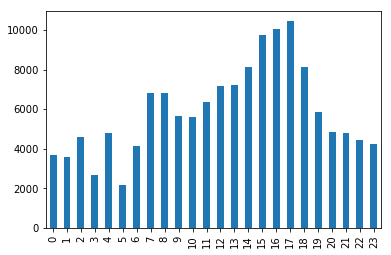

In [206]:
crash_location.datetime.dt.hour.value_counts().sort_index().plot(kind = 'bar')

In [229]:
a = crash_location.datetime.dt.hour.value_counts().sort_index()

pandas.core.series.Series

In [221]:
b = crash_location.groupby(crash_location.datetime.dt.hour).sum().traffic

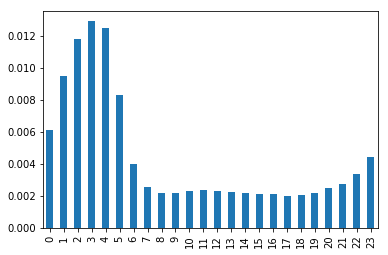

In [223]:
# Very promising !
# Shows higher chance of getting in an accident at night
(a/b).plot(kind = 'bar')

In [238]:
hourly_traffic_crashes = pd.concat([a,b], axis = 1)
hourly_traffic_crashes.head()

,datetime,traffic
datetime,,
0,3710,602283.133333
1,3586,378145.848664
2,4595,388868.219634
3,2679,206953.101631
4,4809,384174.079381


In [247]:
import seaborn as sns

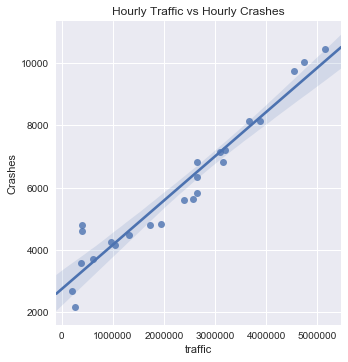

In [252]:
sns.lmplot('traffic','datetime', data = hourly_traffic_crashes)
plt.title('Hourly Traffic vs Hourly Crashes')
plt.ylabel('Crashes')

# Strongly correlated indicating the need for regularization of crashes

In [253]:
hourly_traffic_crashes['regularized'] = hourly_traffic_crashes.datetime/hourly_traffic_crashes.traffic
hourly_traffic_crashes.head()

,datetime,traffic,regularized
datetime,,,
0,3710,602283.133333,0.006160
1,3586,378145.848664,0.009483
2,4595,388868.219634,0.011816
3,2679,206953.101631,0.012945
4,4809,384174.079381,0.012518


C:\Users\Ari\Anaconda3\lib\site-packages\seaborn\linearmodels.py:267: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


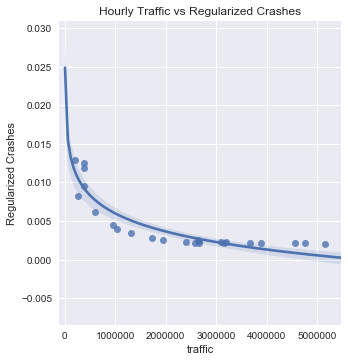

In [257]:
sns.lmplot('traffic','regularized', data = hourly_traffic_crashes,  logx = True)
plt.title('Hourly Traffic vs Regularized Crashes')
plt.ylabel('Regularized Crashes')

#Interesting behavior: regularization removes clear positive correlation and shows a negative log reglationship